## Step 4: Training on the merged dataset

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras import regularizers
from keras.optimizers import Nadam

from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### 4.1. Importing the dataset

In [23]:
csvFilePath = './data/stocks/GoogleWithSentiment.csv'
df = pd.read_csv(csvFilePath)

### 4.2. Creating a function to preprocess the dataset

In [24]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [25]:
def createDataset(dataset, target, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookBack):
        a = dataset[i:(i + lookBack), :]
        dataX.append(a)
        dataY.append(target[i + lookBack])
    return np.array(dataX), np.array(dataY)
#enddef

### 4.3. Preproccessing the dataset for LSTM


In [26]:
features = df.drop(['Date', 'Close'], axis=1).values
target = df['Close'].values

scalerFeatures = MinMaxScaler(feature_range=(0, 1))
scalerTarget = MinMaxScaler(feature_range=(0, 1))

featuresScaled = scalerFeatures.fit_transform(features)
targetScaled = scalerTarget.fit_transform(target.reshape(-1, 1))

lookBack = 3
X, y = createDataset(featuresScaled, targetScaled, lookBack)
print(X[:2])
print(y[:2])

trainSize = int(len(X) * 0.8)
testSize = len(X) - trainSize
trainX, testX = X[0:trainSize, :], X[trainSize:len(X), :]
trainY, testY = y[0:trainSize], y[trainSize:len(y)]

trainX = np.reshape(trainX, (trainX.shape[0], lookBack, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], lookBack, testX.shape[2]))

[[[0.01008781 0.01065157 0.01123814 0.0692677  0.         0.
   0.         0.         0.        ]
  [0.00843978 0.00830954 0.00815883 0.12858584 0.         0.
   0.         0.         0.        ]
  [0.00642886 0.00627638 0.00445027 0.18214242 0.         0.
   0.         0.         0.        ]]

 [[0.00843978 0.00830954 0.00815883 0.12858584 0.         0.
   0.         0.         0.        ]
  [0.00642886 0.00627638 0.00445027 0.18214242 0.         0.
   0.         0.         0.        ]
  [0.00354102 0.0033616  0.00387271 0.15172887 0.         0.
   0.         0.         0.        ]]]
[[0.00243195]
 [0.00296104]]


### 4.4. Building the LSTM model

In [ ]:
batch_size = 16        
epochs = 150           
neurons = 256          
dropout_rate = 0.4     
learning_rate = 0.0001 

model = Sequential()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', input_shape=(lookBack, features.shape[1])))
model.add(Dropout(dropout_rate))
model.add(LSTM(neurons, return_sequences=True, activation='tanh'))
model.add(Dropout(dropout_rate))
model.add(LSTM(neurons, return_sequences=True, activation='tanh'))  
model.add(Dropout(dropout_rate))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout_rate))

model.add(Dense(units=64, activation='relu'))  

model.add(Dense(units=1, activation='linear', activity_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.00001)))

optimizer = Nadam(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=1, 
                    validation_split=0.25, callbacks=[early_stopping])
model.summary()

c:\Users\mjvis\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - loss: 0.0191 - val_loss: 0.0432
Epoch 2/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 143ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 3/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 3.3142e-04 - val_loss: 0.0013
Epoch 4/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 22s 130ms/step - loss: 3.1556e-04 - val_loss: 0.0033
Epoch 5/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - loss: 2.9888e-04 - val_loss: 0.0022
Epoch 6/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - loss: 3.1893e-04 - val_loss: 0.0015
Epoch 7/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 2.5469e-04 - val_loss: 0.0018
Epoch 8/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - loss: 2.7676e-04 - val_loss: 0.0014
Epoch 9/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - loss: 2.8357e-04 - val_loss: 8.8113e-04
Epoch 10/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 2.3415e-04 - val_loss: 0.0012
Epoch 11/150
91/91 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 2.3871e-04 - val_los

### 4.5. Testing the model

#### 4.5.1. Running prediction over the training set and testing set

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictInv = scalerTarget.inverse_transform(trainPredict)
trainYInv = scalerTarget.inverse_transform(np.reshape(trainY, (trainY.shape[0], 1)))
testPredictInv = scalerTarget.inverse_transform(testPredict)
testYInv = scalerTarget.inverse_transform(np.reshape(testY, (testY.shape[0], 1)))

51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


#### 4.5.2. Calculating the score and accuracy of the model

In [ ]:
train_rmse = np.sqrt(mean_squared_error(trainYInv[:, 0], trainPredictInv[:, 0]))
train_mae = mean_absolute_error(trainYInv[:, 0], trainPredictInv[:, 0])
train_r2 = r2_score(trainYInv[:, 0], trainPredictInv[:, 0])
train_accuracy = 100 - (train_rmse / np.mean(trainYInv) * 100)

test_rmse = np.sqrt(mean_squared_error(testYInv[:, 0], testPredictInv[:, 0]))
test_mae = mean_absolute_error(testYInv[:, 0], testPredictInv[:, 0])
test_r2 = r2_score(testYInv[:, 0], testPredictInv[:, 0])
test_accuracy = 100 - (test_rmse / np.mean(testYInv) * 100)

metrics_data = {
    'Metric': ['RMSE', 'MAE', 'R²', 'Accuracy'],
    'Training Set': [train_rmse, train_mae, train_r2, train_accuracy],
    'Testing Set': [test_rmse, test_mae, test_r2, test_accuracy]
}

metrics_df = pd.DataFrame(metrics_data)

print(metrics_df)


     Metric  Training Set  Testing Set
0      RMSE      6.682520     3.215719
1       MAE      4.643565     2.478628
2        R²      0.981950     0.947211
3  Accuracy     95.948669    96.151936


In [ ]:
# For LSTM
model.save('models/lstm_model.h5')


#### 4.5.3. Visualizing the data

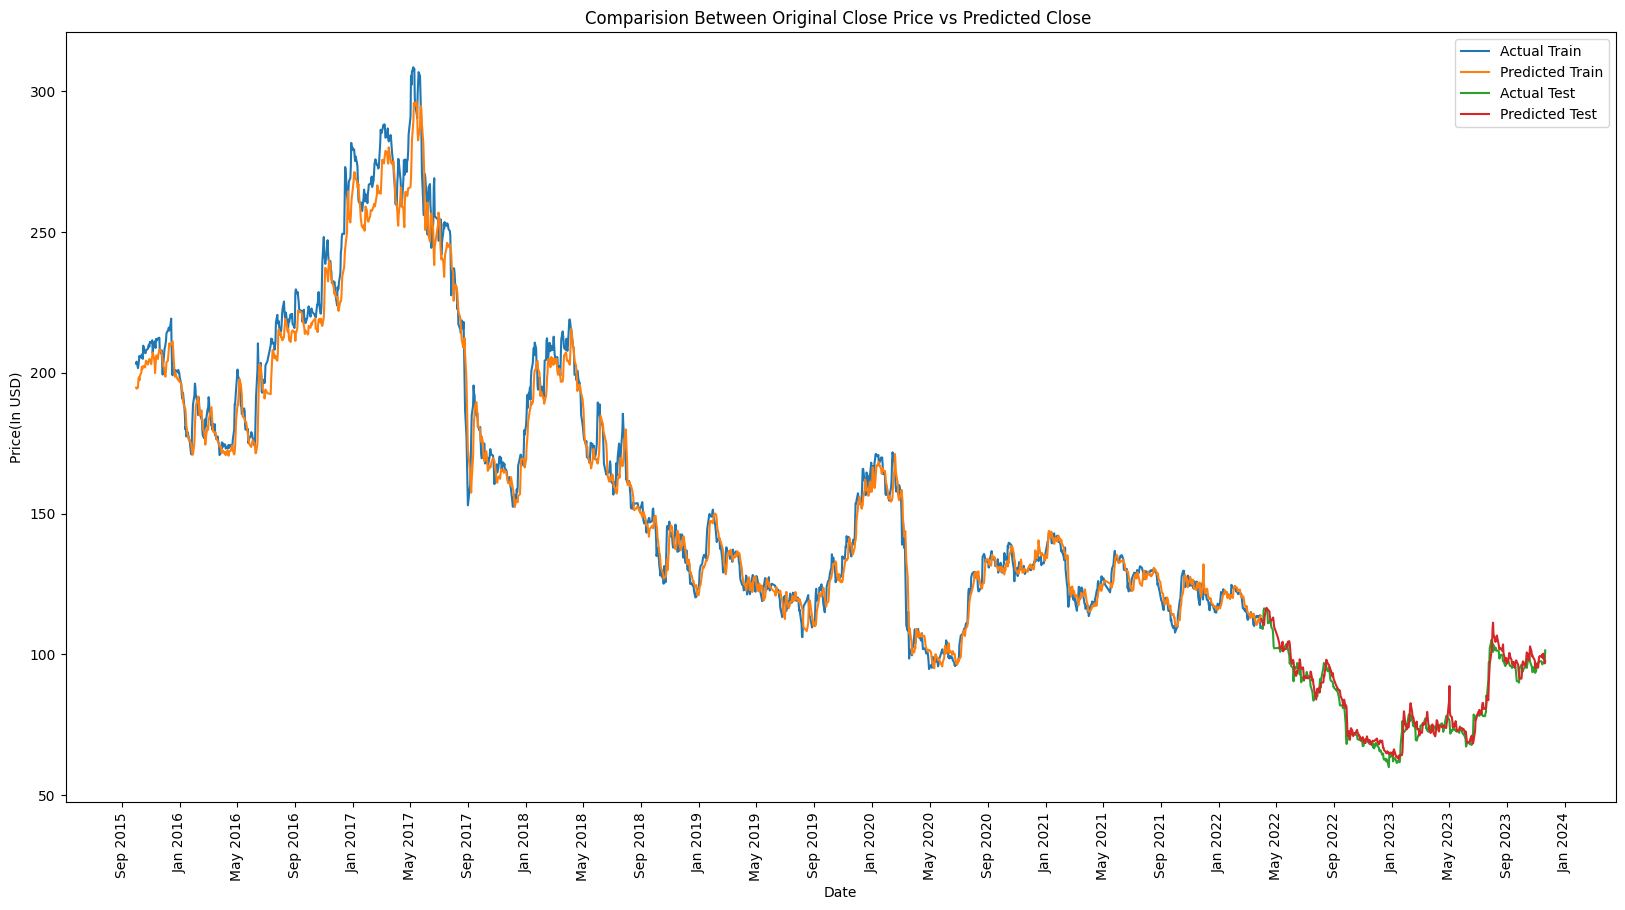

In [ ]:
dates = pd.to_datetime(df['Date']).values
sampleInterval = 60
sampledDates = dates[::sampleInterval]

plt.figure(figsize=(20, 10))

plt.plot(dates[:len(trainY)], trainYInv, label='Actual Train')
plt.plot(dates[:len(trainPredict)], trainPredictInv, label='Predicted Train')
plt.plot(dates[len(trainY):len(trainY) + len(testY)], testYInv, label='Actual Test')
plt.plot(dates[len(trainPredict):len(trainPredict) + len(testPredict)], testPredictInv, label='Predicted Test')
plt.title("Comparision Between Original Close Price vs Predicted Close ")

plt.xlabel("Date")
plt.ylabel("Price(In USD)")  
plt.xticks(rotation=90)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.legend()
plt.show()